# Course:  Convolutional Neural Networks for Image Classification

## Section-8
### Change brightness of images in dataset

**Description:**  
*Generate additional images by random brightness  
Plot resulted images*  

**File:** *brightness_changing.ipynb*

### Algorithm:

**--> Step 1:** Open Traffic Signs dataset  
**--> Step 2:** Apply random brightness changing  
**--> Step 3:** Visualize examples  


**Result:**  
- Plot with images before and after brightness changing

## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py
import cv2


## Setting up full path

In [2]:
# Full or absolute path to 'Section3' with Traffic Signs dataset
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section3'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section3'
full_path_to_Section3 = \
    'C:\\Users\\anaso\\OneDrive - Instituto Superior de Engenharia de Lisboa\\CNNCourse\\Section3'


## Step 1: Opening Traffic Signs dataset

In [3]:
# Opening saved Traffic Signs dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section3 + '/' + 'dataset_ts.hdf5', 'r') as f:
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays


# Check point
print('Traffic Signs dataset is successfully opened')


Traffic Signs dataset is successfully opened
Traffic Signs dataset is successfully opened


In [4]:
# Check point
# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)


(36288, 48, 48, 3)
(36288,)
(36288, 48, 48, 3)
(36288,)


## Step 2: Applying random brightness changing

In [5]:
# Defining function for changing brightness
def brightness_changing(input_image):
    # Converting input image from RGB to HSV colour space
    image_hsv = cv2.cvtColor(input_image, cv2.COLOR_RGB2HSV)
    
    # Defining random value (positive or negative) for changing brightness
    # To make image darker or brighter
    n = np.random.choice([-1, 1])
    
    # Checking if n is negative
    if n == -1:
        # Preparing value to darken image with
        random_brightness = n * np.random.randint(low=5, high=10)
        
    # Otherwise, if n is positive
    elif n == 1:
        # Preparing value to brighten image with
        random_brightness = np.random.randint(low=50, high=75)
    
    # Changing Value channel for HSV image
    image_hsv[:, :, 2] += random_brightness
    
    # To exclude pixels' values that are less than 0 and more than 255,
    # Numpy function 'clip' is applied
    # It keeps values of array in the given range
    # And it replaces non-needed values with boundary numbers
    image_hsv[:, :, 2] = np.clip(image_hsv[:, :, 2], 0, 255)
    
    # Converting resulted HSV image back to RGB colour space
    image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
    
    # Returning resulted image with changed brightness
    return image_rgb


# Check point
print('Function to randomly change brightness is successfully defined')


Function to randomly change brightness is successfully defined
Function to randomly change brightness is successfully defined


In [6]:
# Defining list to collect new images
x_temp = []


# Iterating first 15 images from loaded dataset
# Applying function to change brightness
# Adding results into the list
for i in range(15):
    x_temp.append(brightness_changing(x_train[i]))


# Converting list into Numpy array
x_temp = np.array(x_temp)  # Numpy array


# Check point
print('Brightness of the first 15 images is successfully changed')


Brightness of the first 15 images is successfully changed
Brightness of the first 15 images is successfully changed


In [7]:
# Check points
# Showing some pixels' values before and after brightness changing
print('Original pixels values:')
print(x_train[0, 24, :10, 0].astype('uint8'))
print()
print('Changed pixels values')
print(x_temp[0, 24, :10, 0].astype('uint8'))


Original pixels values:
[36 39 45 57 69 82 88 84 77 90]

Changed pixels values
[30 33 39 51 63 76 82 78 71 84]
Original pixels values:
[36 39 45 57 69 82 88 84 77 90]

Changed pixels values
[30 33 39 51 63 76 82 78 71 84]


## Step 3: Visualizing examples

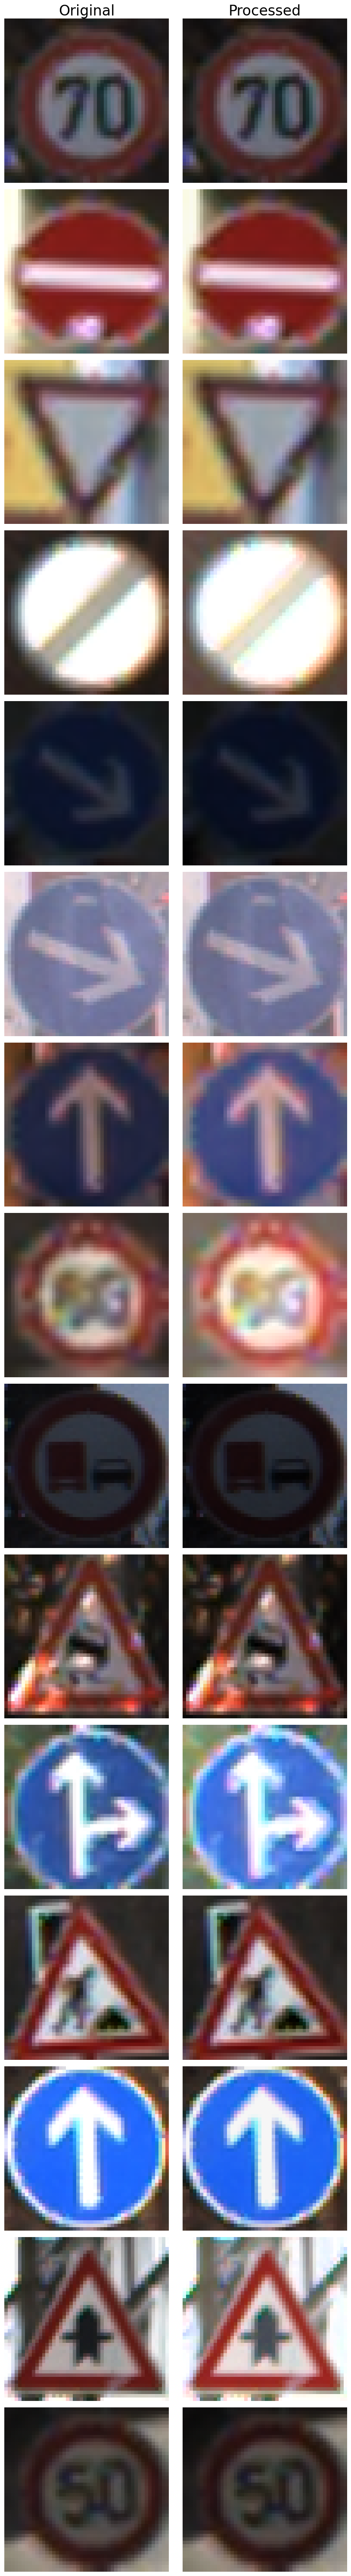

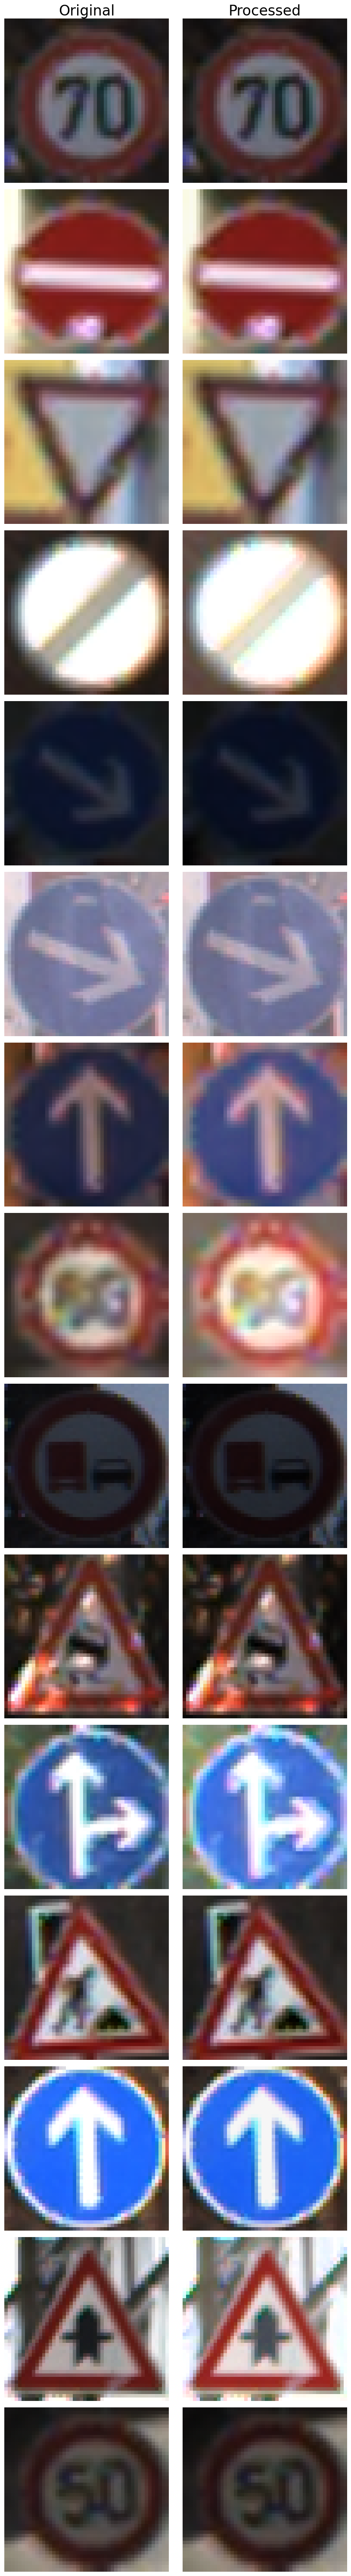

In [8]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (9.0, 60.0)


# Defining a figure object with number of needed subplots
# ax is a (15, 2) Numpy array
# To access specific subplot we call it by ax[0, 0]
figure, ax = plt.subplots(nrows=15, ncols=2)


# Plotting 30 examples along 15 rows and 2 columns
for i in range(15):
    # Plotting original images in the first column
    ax[i, 0].imshow(x_train[i].astype('uint8'))
    
    # Plotting changed images in the second column
    ax[i, 1].imshow(x_temp[i].astype('uint8'))
    
    # Hiding axes
    ax[i, 0].axis('off')
    ax[i, 1].axis('off')


# Giving names to columns
ax[0, 0].set_title('Original', fontsize=24)
ax[0, 1].set_title('Processed', fontsize=24)


# Adjusting distance between subplots
plt.tight_layout()


# Showing the plot
plt.show()


### Some comments

To get more details for usage of 'np.random.choice':  
**print(help(np.random.choice))**
  
More details and examples are here:  
 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html  


In [9]:
print(help(np.random.choice))

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``a`` can be selected mu